In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('dataset_classification/Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
encoder = LabelEncoder()

# Yes No --> {Yes:1,No:0} --> trans: changes into the list
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

In [6]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [7]:
x = df.drop(columns='Performance Index')
y = df['Performance Index']

In [8]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [9]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [10]:
model = LinearRegression()

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=2)

model.fit(x_train, y_train)

LinearRegression()

In [11]:
y_train

7878    26.0
3224    34.0
1919    80.0
4432    62.0
4835    83.0
        ... 
9073    91.0
8584    15.0
5390    44.0
5092    31.0
2964    67.0
Name: Performance Index, Length: 2000, dtype: float64

In [12]:
model.coef_

array([2.85155023, 1.01383063, 0.68832496, 0.46896061, 0.17737   ])

In [13]:
model.intercept_

-33.66338977034197

In [14]:
y_predict = model.predict(x_test)

In [15]:
y_predict

array([80.52468321, 68.51923461, 43.23699494, ..., 75.67890739,
       39.76466527, 77.12747842])

In [16]:
y.unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [17]:
r2_score(y_test, y_predict)

0.9886134597409086

In [18]:
mean_absolute_error(y_test, y_predict)

1.6263518609173535

In [19]:
mean_squared_error(y_test, y_predict)

4.190020023218349

<Axes: ylabel='Frequency'>

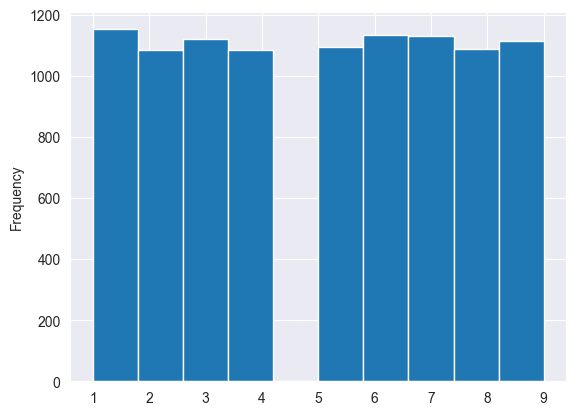

In [20]:
# Classification

df['Hours Studied'].unique()
df['Hours Studied'].plot.hist()

In [21]:
x = df.drop(columns='Hours Studied')
y = df['Hours Studied']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [22]:
x

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,99,1,9,1,91.0
1,82,0,4,2,65.0
2,51,1,7,2,45.0
3,52,1,5,2,36.0
4,75,0,8,5,66.0
...,...,...,...,...,...
9995,49,1,4,2,23.0
9996,64,1,8,5,58.0
9997,83,1,8,5,74.0
9998,97,1,7,0,95.0


In [23]:
y

0       7
1       4
2       8
3       5
4       7
       ..
9995    1
9996    7
9997    6
9998    9
9999    7
Name: Hours Studied, Length: 10000, dtype: int64

In [24]:
model = LogisticRegression() #classification

model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred

array([4, 7, 8, ..., 6, 4, 1])

In [27]:
f1_score(y_test, y_pred, average='micro')

0.378

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.68      0.54       219
           2       0.25      0.15      0.19       201
           3       0.25      0.23      0.24       230
           4       0.22      0.28      0.25       190
           5       0.33      0.26      0.29       238
           6       0.34      0.30      0.32       243
           7       0.36      0.38      0.37       224
           8       0.45      0.43      0.44       236
           9       0.67      0.68      0.68       219

    accuracy                           0.38      2000
   macro avg       0.37      0.38      0.37      2000
weighted avg       0.37      0.38      0.37      2000



In [29]:
print(accuracy_score(y_test, y_pred))

0.378


In [30]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = model.predict(x_test)

In [32]:
y_pred

array([1, 7, 8, ..., 6, 2, 2])

In [33]:
accuracy_score(y_test, y_pred)

0.4865